# Пример с распознаванием цифр

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем данные

In [117]:
digits = datasets.load_digits()

In [118]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

Пример первой цифры

In [119]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [120]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [121]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [122]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

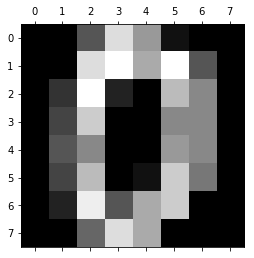

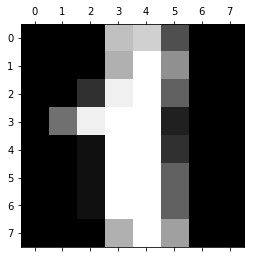

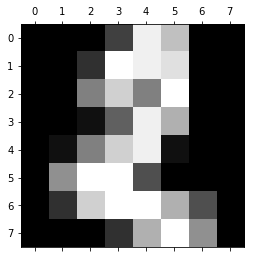

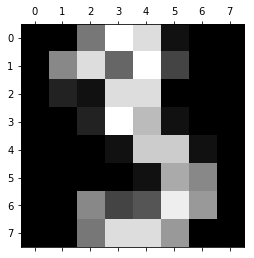

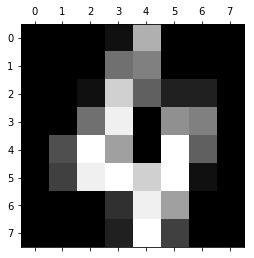

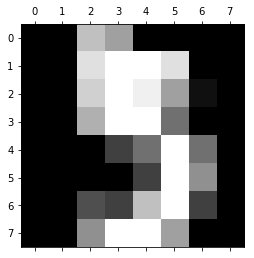

In [123]:
plt.gray()
for i in range(0, 6):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [124]:
X_digits = digits.data
Y_digits = digits.target
Y_digits

array([0, 1, 2, ..., 8, 9, 8])

Количество цифр в данных

In [125]:
n_samples = len( X_digits )
n_samples

1797

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [126]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [127]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]
len(X_train)

1617

In [128]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]
len(X_test)

180

Формируем тестовую выборку и обучаем модель knn

In [129]:
from sklearn.neighbors import KNeighborsClassifier


Побираем лучшие параметры модели перебором

In [134]:
for n in range(1,10):
    knn = KNeighborsClassifier(n_neighbors= n, n_jobs=-1)
    knn.fit(X_train,Y_train)
    print(knn.score(X_test, Y_test), 'n=', n)

0.9666666666666667 n= 1
0.9777777777777777 n= 2
0.9666666666666667 n= 3
0.9666666666666667 n= 4
0.9611111111111111 n= 5
0.9611111111111111 n= 6
0.9611111111111111 n= 7
0.9611111111111111 n= 8
0.9611111111111111 n= 9


In [135]:
knn_best = KNeighborsClassifier(n_neighbors= 2, n_jobs=-1)
knn_best.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

Лучшая точность при n=2,  сней и работаем

In [137]:
knn_best.score( X_test, Y_test )

0.9777777777777777

In [138]:
y_predic = knn.predict(X_test)

In [139]:
y_predic

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 3, 5, 7,
       4, 5, 0, 8, 9, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       8, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 5, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 1, 4, 9,
       0, 8, 9, 8])

<Figure size 432x288 with 0 Axes>

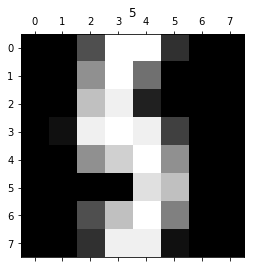

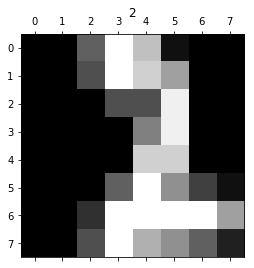

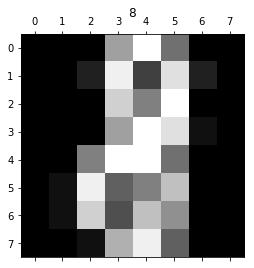

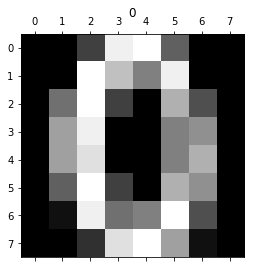

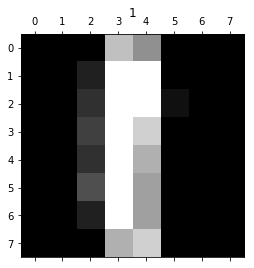

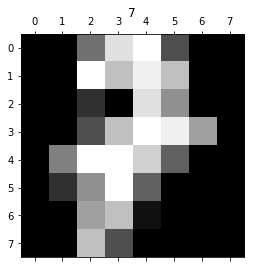

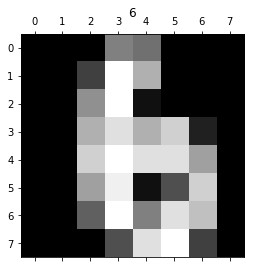

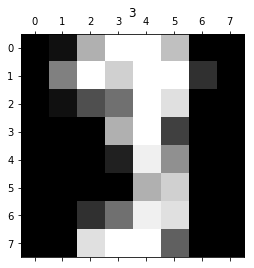

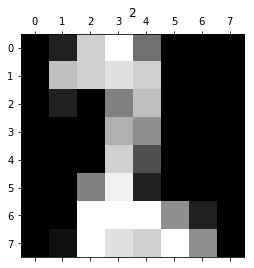

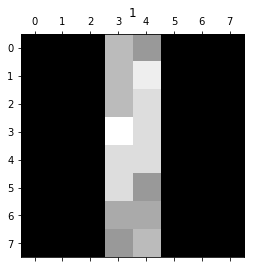

In [141]:
image_test = digits.images[split:]
plt.gray()
for i in range(0, 10):
    plt.matshow(image_test[i])
    plt.title(y_predic[i])
    
plt.show() 